In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


# Data Loading and Preprocessing

In [ ]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 24s 2us/step


In [ ]:
first_image = X_train[0, :, :]

In [ ]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [5]:
num_classes = len(np.unique(y_train))
num_classes

10

In [6]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(60000, 28, 28)

In [7]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [8]:
input_dim = np.prod(X_train.shape[1:])
input_dim

784

In [9]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be matrices with 784 (= 28 * 28) features.
X_train = X_train.reshape(60000, input_dim).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')

In [10]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [11]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [12]:
# We convert the class labels to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Logistic Regression

In [13]:
# All the logic to build a (multinomial) logistic regression classifier
model = Sequential()
model.add(Dense(num_classes, input_dim=input_dim, activation='softmax'))

## Two Ways to Summarize Model

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Train Classifier

In [16]:
# Trains the model, iterating on the training data in batches of 32 in 10 epochs.
# The optimizer is stochastic gradient descent (SGD).
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.7714 - acc: 0.8208     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.4548 - acc: 0.8821     - ETA: 0s - loss: 0.4631 - a
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.4029 - acc: 0.8921     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.3767 - acc: 0.8973     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.3600 - acc: 0.9013     
Epoch 6/10
60000/60000 [==============================] - ETA: 0s - loss: 0.3485 - acc: 0.903 - 2s - loss: 0.3483 - acc: 0.9038     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.3393 - acc: 0.9063     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.3320 - acc: 0.9078     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.3263 - acc: 0.9095     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.3214 - 

## Model Evaluation

In [17]:
# Test accuracy is ~92%.
model.evaluate(X_test, y_test, verbose=False)

[0.3067630158960819, 0.91539999999999999]

## Predicting a Couple of Held-Out Images

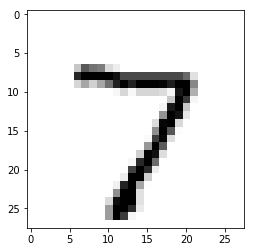

In [18]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

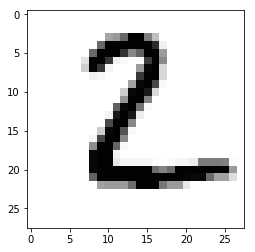

In [19]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [20]:
model.predict_classes(X_test[[0, 1], :])

2/2 [==============================] - 0s


array([7, 2])